In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("C:\\PYTHON Files\\Banking Dataset - Banking Dataset.csv")

In [12]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [14]:
data.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
data.shape

(45211, 17)

In [22]:
data.size

768587

In [24]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

C:\Users\kayah\AppData\Local\Temp\ipykernel_37068\1180754290.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=data, palette='viridis')


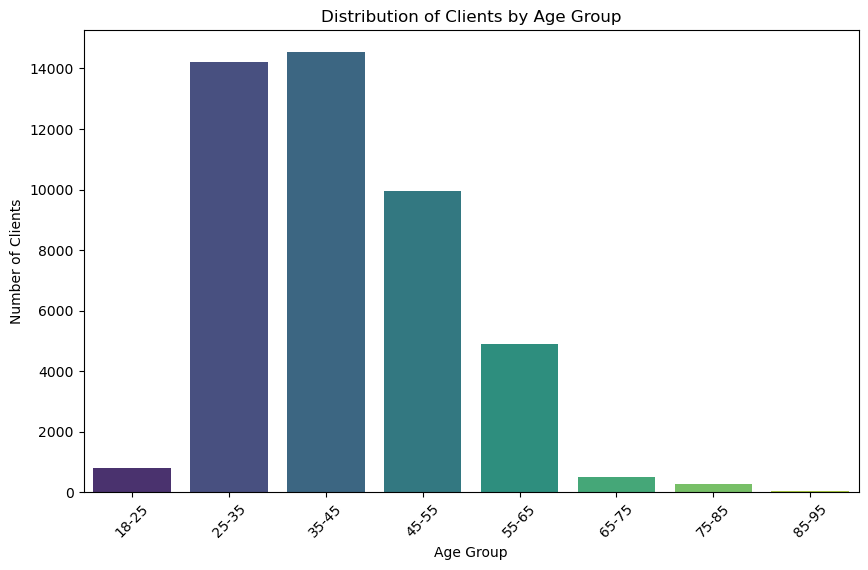

In [30]:
#1 What is the distribution of clients by age group?
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]  # Adjust as per your data range
age_labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85', '85-95']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Plot the distribution of clients by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=data, palette='viridis')
plt.title('Distribution of Clients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.show()

['no' 'yes']


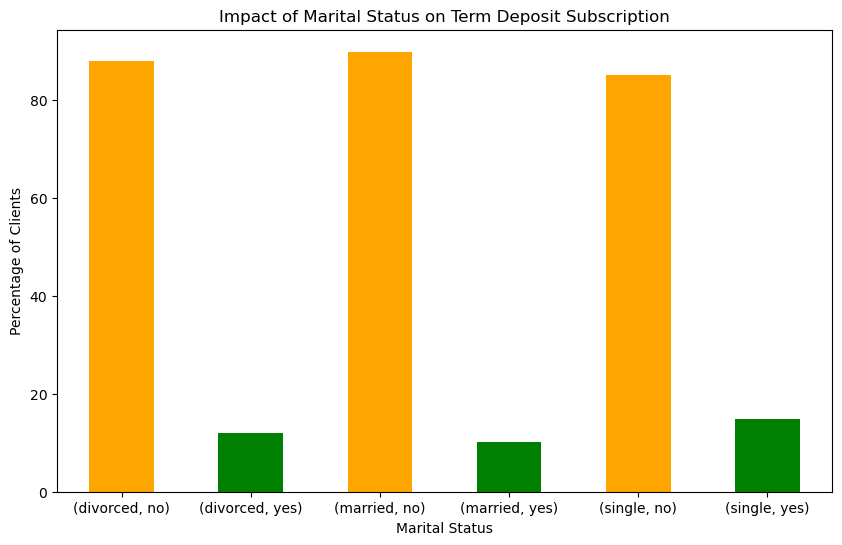

In [54]:
#2 What is the impact of marital status on the likelihood of subscribing to a term deposit
# Check the unique values in the 'y' column (subscription outcome)
print(data['y'].unique()) 

# Calculate the percentage of clients who subscribed based on marital status
marital_subscription = data.groupby('marital')['y'].value_counts(normalize=True) * 100

# Plot the result
plt.figure(figsize=(10, 6))
marital_subscription.plot(kind='bar', stacked=True, color=['orange', 'green'])
plt.title('Impact of Marital Status on Term Deposit Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Clients')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

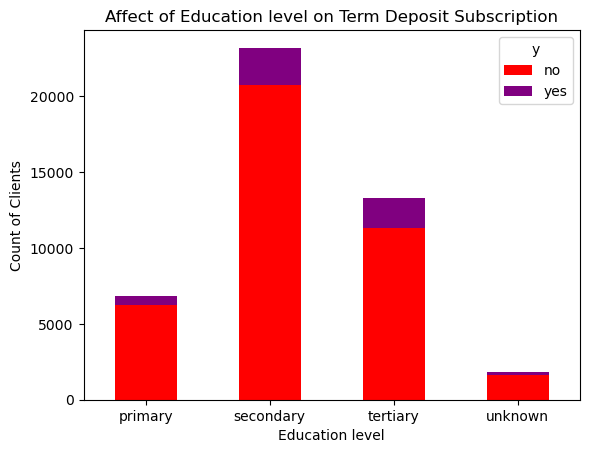

In [66]:
#3 How does education level affect the subscription rate for term deposits
education_subscription = data.groupby('education')['y'].value_counts().unstack()

#plot
plt.figure(figsize=(10, 6))
education_subscription.plot(kind='bar', stacked=True, color=['red', 'purple'])
plt.title('Affect of Education level on Term Deposit Subscription')
plt.xlabel('Education level')
plt.ylabel('Count of Clients')
plt.xticks(rotation=0)
plt.show()

['no' 'yes']


C:\Users\kayah\AppData\Local\Temp\ipykernel_37068\3527923641.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='default', y='y_numeric', data=data, palette='Set2', inner='box')


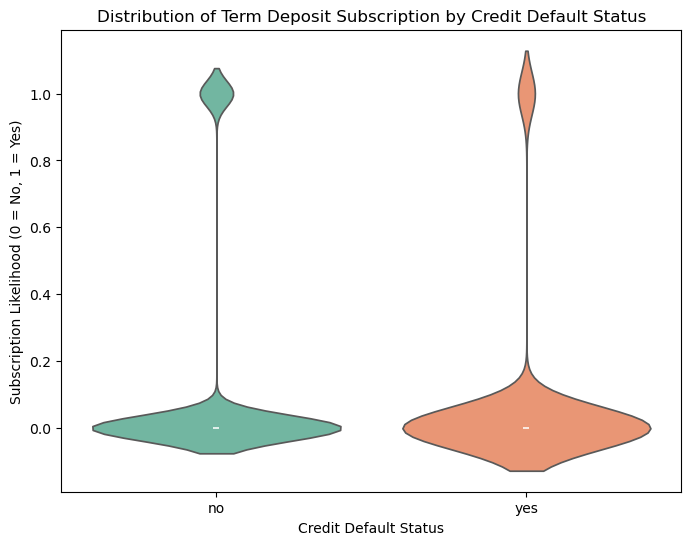

In [72]:
#4 What is the relationship between having a credit default and subscribing to a term deposit
print(data['default'].unique()) 

data['y_numeric'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Plot a violin plot for credit default status vs subscription
plt.figure(figsize=(8, 6))
sns.violinplot(x='default', y='y_numeric', data=data, palette='Set2', inner='box')
plt.title('Distribution of Term Deposit Subscription by Credit Default Status')
plt.xlabel('Credit Default Status')
plt.ylabel('Subscription Likelihood (0 = No, 1 = Yes)')
plt.show()

C:\Users\kayah\AppData\Local\Temp\ipykernel_37068\2576529473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='y', y='balance', data=average_balance, palette='viridis')


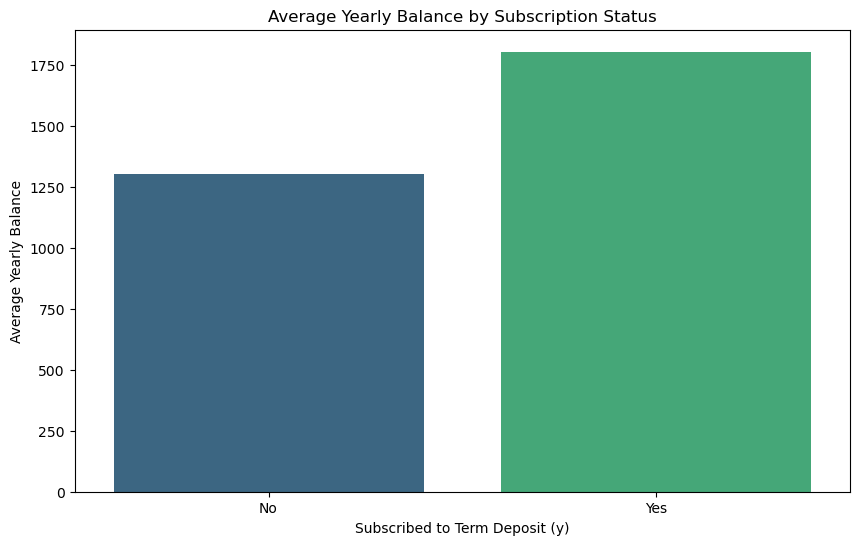

In [93]:
#5 How does the average yearly balance influence the likelihood of subscribing to a term deposit
average_balance = data.groupby('y')['balance'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='y', y='balance', data=average_balance, palette='viridis')
plt.title('Average Yearly Balance by Subscription Status')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Average Yearly Balance')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

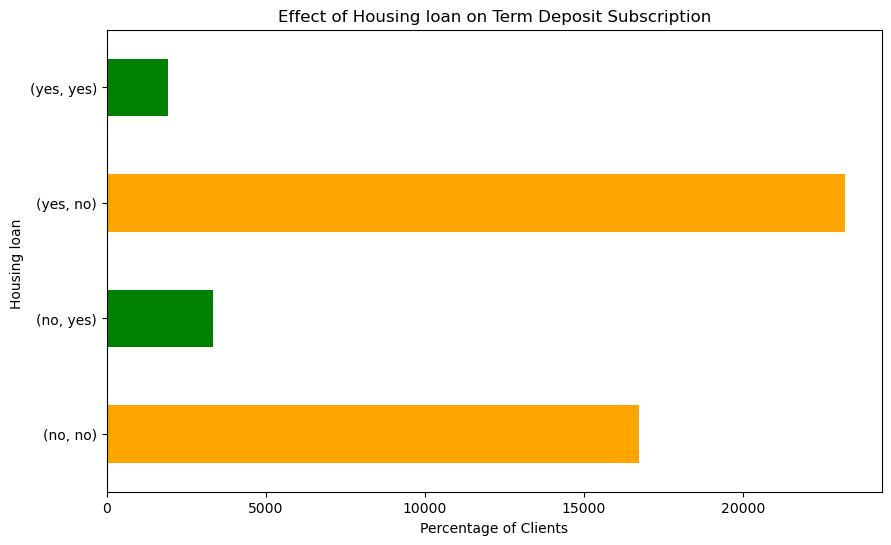

In [101]:
#6 What is the effect of having a housing loan on the subscription rate for term deposits?
house_subscription = data.groupby('housing')['y'].value_counts() 

# Plot the result
plt.figure(figsize=(10, 6))
house_subscription.plot(kind='barh', stacked=True, color=['orange', 'green'])
plt.title('Effect of Housing loan on Term Deposit Subscription')
plt.xlabel('Percentage of Clients')
plt.ylabel('Housing loan ')
plt.xticks(rotation=0)
plt.show()

y        no   yes
loan             
no    33162  4805
yes    6760   484


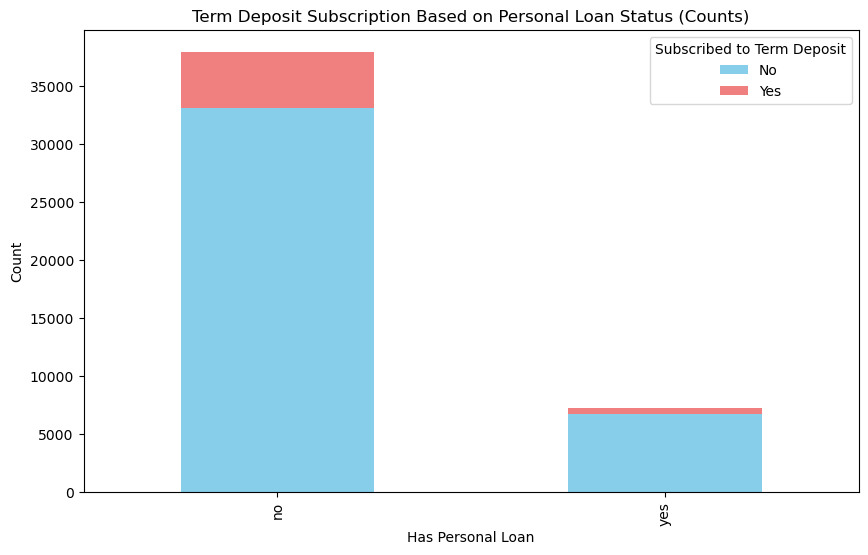

In [105]:
#7 How does having a personal loan impact the likelihood of subscribing to a term deposit
loan_subscription_counts = data.groupby(['loan', 'y']).size().unstack(fill_value=0)
print(loan_subscription_counts)

# Step 4: Plot the raw counts using a bar plot
loan_subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Term Deposit Subscription Based on Personal Loan Status (Counts)')
plt.xlabel('Has Personal Loan')
plt.ylabel('Count')
plt.legend(title='Subscribed to Term Deposit', loc='upper right', labels=['No', 'Yes'])
plt.show()

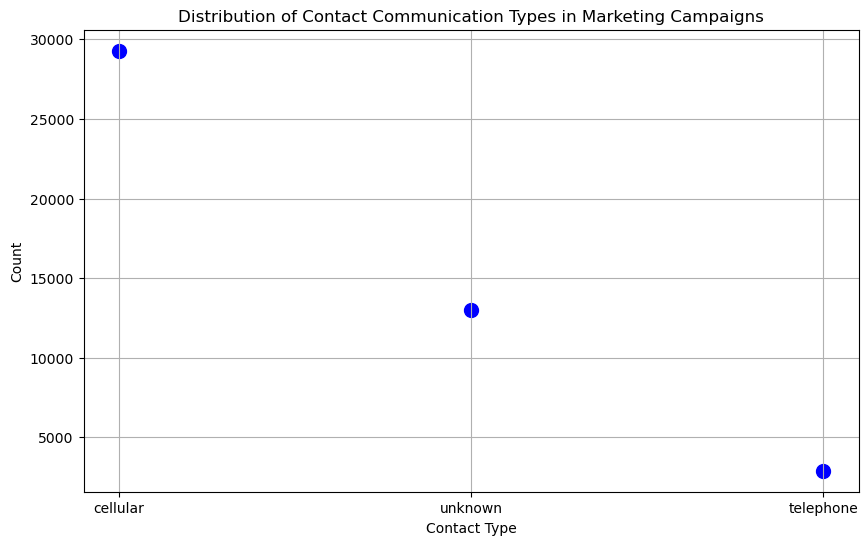

In [111]:
#8 What is the distribution of contact communication types used in the marketing campaigns?

contact_counts = data['contact'].value_counts().reset_index()
contact_counts.columns = ['contact_type', 'count']

plt.figure(figsize=(10, 6))
plt.scatter(contact_counts['contact_type'], contact_counts['count'], color='blue', s=100)
plt.title('Distribution of Contact Communication Types in Marketing Campaigns')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()


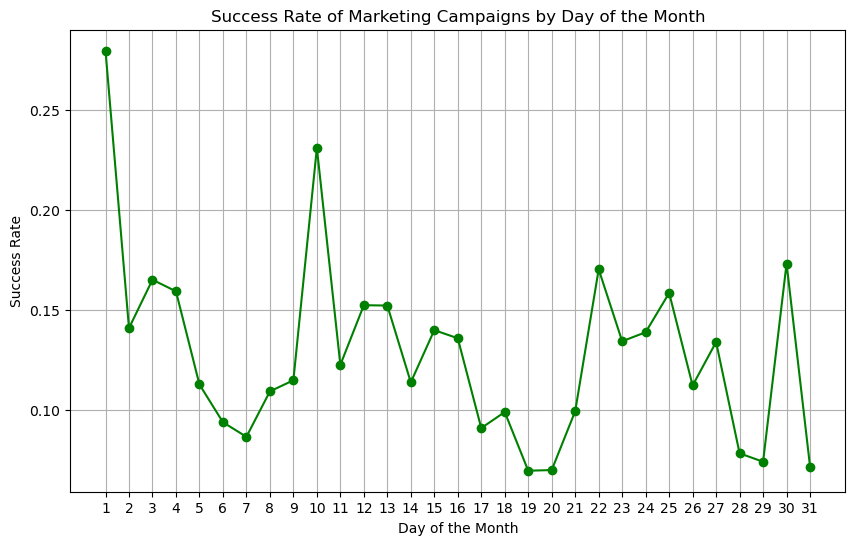

In [115]:
#9 How does the day of the month affect the success rate of the marketing campaigns?

data['y_value'] = data['y'].map({'yes': 1, 'no': 0}) #used to replace values 

day_success_rate = data.groupby('day')['y_value'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(day_success_rate['day'], day_success_rate['y_value'], marker='o', linestyle='-', color='green')
plt.title('Success Rate of Marketing Campaigns by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Success Rate')
plt.xticks(ticks=range(1, 32))  # Days of the month typically range from 1 to 31
plt.grid(True)
plt.show()


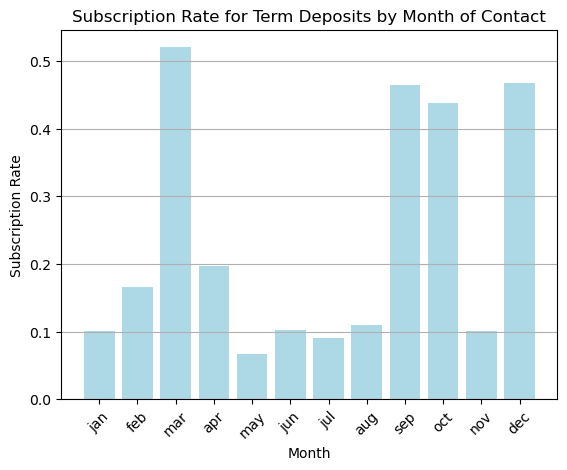

In [121]:
#10 What is the impact of the month of contact on the subscription rate for term deposit

data['y_value'] = data['y'].map({'yes': 1, 'no': 0})

month_subscription_rate = data.groupby('month')['y_value'].mean().reset_index()


months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_subscription_rate['month'] = pd.Categorical(month_subscription_rate['month'], categories=months_order, ordered=True)
month_subscription_rate = month_subscription_rate.sort_values('month')

plt.bar(month_subscription_rate['month'], month_subscription_rate['y_value'], color='lightblue')
plt.title('Subscription Rate for Term Deposits by Month of Contact')
plt.xlabel('Month')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)  # Rotate month labels for better visibility
plt.grid(axis='y')
plt.show()


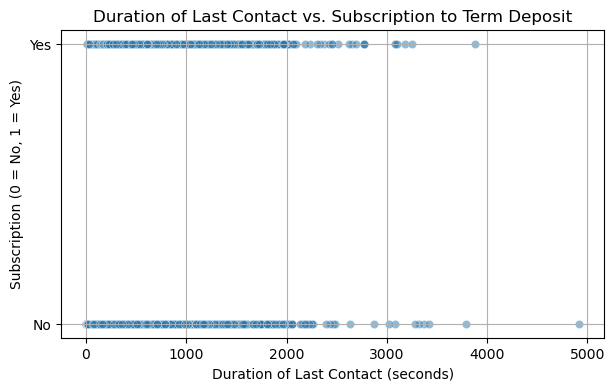

In [129]:
#11 How does the duration of the last contact influence the likelihood of subscribing to a term deposit?

data['y_value'] = data['y'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(7, 4))
sns.scatterplot(x='duration', y='y_value', data=data, alpha=0.5)
plt.title('Duration of Last Contact vs. Subscription to Term Deposit')
plt.xlabel('Duration of Last Contact (seconds)')
plt.ylabel('Subscription (0 = No, 1 = Yes)')
plt.yticks([0, 1], ['No', 'Yes'])  # Set y-ticks for clarity
plt.grid(True)
plt.show()


C:\Users\kayah\AppData\Local\Temp\ipykernel_37068\1207421582.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='poutcome_binary', y='y_binary', data=poutcome_success_rate, palette='pastel')


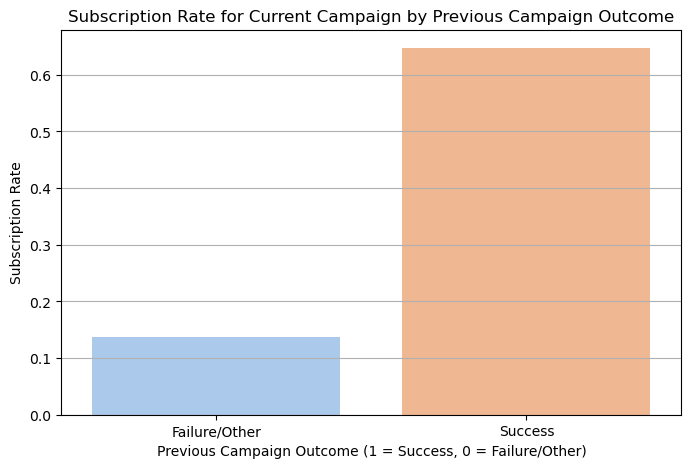

In [145]:
#12 What is the impact of the outcome of the previous marketing campaign on the current campaign’s success?

data['y_binary'] = data['y'].map({'yes': 1, 'no': 0})

data['poutcome_binary'] = data['poutcome'].map({'success': 1, 'failure': 0, 'other': 0})

poutcome_success_rate = data.groupby('poutcome_binary')['y_binary'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='poutcome_binary', y='y_binary', data=poutcome_success_rate, palette='pastel')
plt.title('Subscription Rate for Current Campaign by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome (1 = Success, 0 = Failure/Other)')
plt.ylabel('Subscription Rate')
plt.xticks(ticks=[0, 1], labels=['Failure/Other', 'Success'])  # Custom labels for clarity
plt.grid(axis='y')
plt.show()


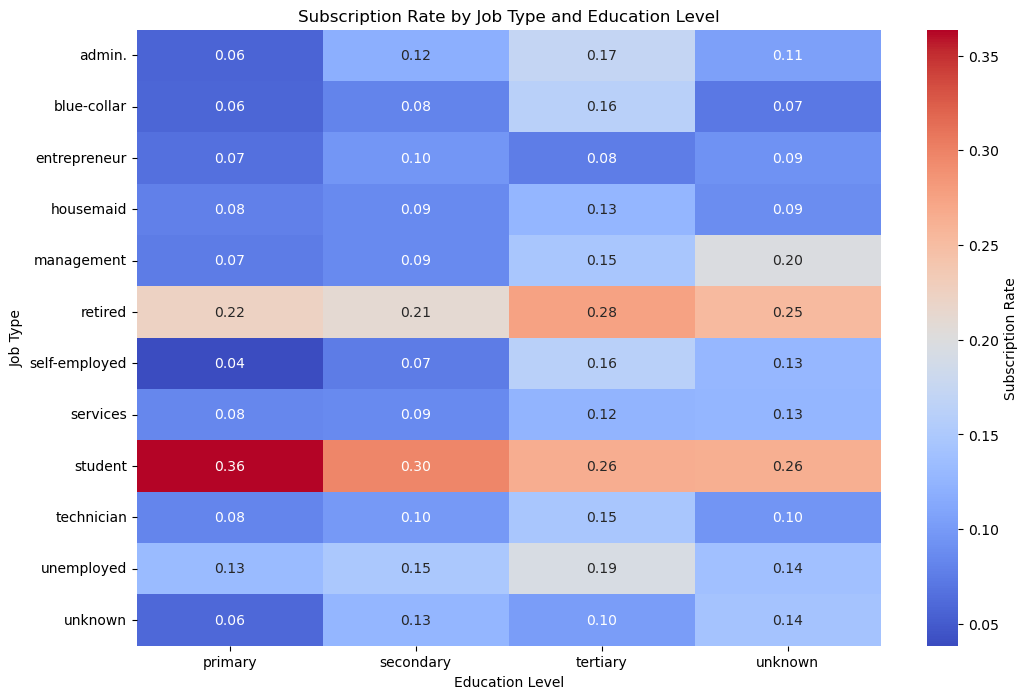

In [153]:
#13 How does the subscription rate vary by different combinations of job type and education level

data['y_binary'] = data['y'].map({'yes': 1, 'no': 0})

subscription_rates = data.groupby(['job', 'education'])['y_binary'].mean().reset_index()

pivot_table = subscription_rates.pivot(index='job', columns='education', values='y_binary')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Subscription Rate'})
plt.title('Subscription Rate by Job Type and Education Level')
plt.xlabel('Education Level')
plt.ylabel('Job Type')
plt.show()


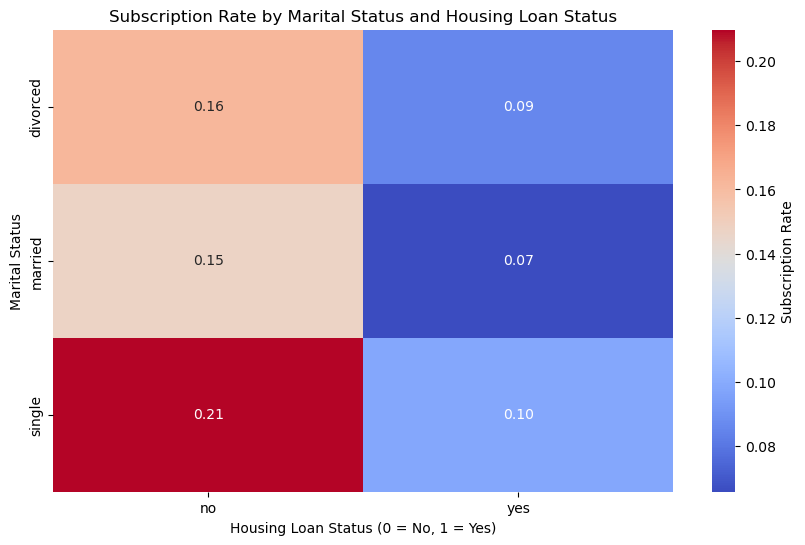

In [155]:
#14 How does the subscription rate vary by different combinations of marital status and housing loan status

data['y_binary'] = data['y'].map({'yes': 1, 'no': 0})

subscription_rates = data.groupby(['marital', 'housing'])['y_binary'].mean().reset_index()

pivot_table = subscription_rates.pivot(index='marital', columns='housing', values='y_binary')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Subscription Rate'})
plt.title('Subscription Rate by Marital Status and Housing Loan Status')
plt.xlabel('Housing Loan Status (0 = No, 1 = Yes)')
plt.ylabel('Marital Status')
plt.show()
